<a href="https://colab.research.google.com/github/Arminismus/Deep-Learning-EXPS/blob/main/PCA_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
X = np.random.randint(10,50,100).reshape(20,5)

array([[19, 27, 35, 29, 29],
       [37, 38, 15, 19, 18],
       [32, 15, 31, 14, 30],
       [30, 17, 11, 25, 24],
       [49, 25, 33, 36, 23],
       [28, 45, 21, 44, 36],
       [39, 27, 10, 22, 44],
       [24, 24, 10, 45, 45],
       [28, 11, 45, 26, 35],
       [28, 21, 38, 13, 36],
       [29, 33, 14, 32, 44],
       [33, 29, 48, 40, 31],
       [47, 19, 26, 31, 20],
       [27, 43, 12, 35, 11],
       [10, 27, 15, 45, 34],
       [35, 43, 19, 41, 10],
       [32, 34, 19, 40, 36],
       [14, 23, 39, 25, 48],
       [34, 10, 49, 17, 42],
       [28, 40, 47, 27, 23]])

In [ ]:
X_meaned = X - np.mean(X,axis = 0)
X_meaned

array([[-11.15,  -0.55,   8.15,  -1.3 ,  -1.95],
       [  6.85,  10.45, -11.85, -11.3 , -12.95],
       [  1.85, -12.55,   4.15, -16.3 ,  -0.95],
       [ -0.15, -10.55, -15.85,  -5.3 ,  -6.95],
       [ 18.85,  -2.55,   6.15,   5.7 ,  -7.95],
       [ -2.15,  17.45,  -5.85,  13.7 ,   5.05],
       [  8.85,  -0.55, -16.85,  -8.3 ,  13.05],
       [ -6.15,  -3.55, -16.85,  14.7 ,  14.05],
       [ -2.15, -16.55,  18.15,  -4.3 ,   4.05],
       [ -2.15,  -6.55,  11.15, -17.3 ,   5.05],
       [ -1.15,   5.45, -12.85,   1.7 ,  13.05],
       [  2.85,   1.45,  21.15,   9.7 ,   0.05],
       [ 16.85,  -8.55,  -0.85,   0.7 , -10.95],
       [ -3.15,  15.45, -14.85,   4.7 , -19.95],
       [-20.15,  -0.55, -11.85,  14.7 ,   3.05],
       [  4.85,  15.45,  -7.85,  10.7 , -20.95],
       [  1.85,   6.45,  -7.85,   9.7 ,   5.05],
       [-16.15,  -4.55,  12.15,  -5.3 ,  17.05],
       [  3.85, -17.55,  22.15, -13.3 ,  11.05],
       [ -2.15,  12.45,  20.15,  -3.3 ,  -7.95]])

In [ ]:
#Creating a covariance matrix 

cov_mat = np.cov(X_meaned,rowvar = False)

In [ ]:
cov_mat

array([[ 8.82394737e+01, -4.24473684e+00, -1.34210526e-01,
        -1.54684211e+01, -3.81500000e+01],
       [-4.24473684e+00,  1.11944737e+02, -5.55447368e+01,
         5.42473684e+01, -4.76026316e+01],
       [-1.34210526e-01, -5.55447368e+01,  1.95292105e+02,
        -4.90052632e+01,  1.88342105e+01],
       [-1.54684211e+01,  5.42473684e+01, -4.90052632e+01,
         1.05589474e+02, -1.06157895e+01],
       [-3.81500000e+01, -4.76026316e+01,  1.88342105e+01,
        -1.06157895e+01,  1.24050000e+02]])

In [ ]:
eigen_values,eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
# we sort the eigen_vectors via their eigen values, sorting them by variability

array([[-0.34919394,  0.66833421, -0.42042245,  0.5043512 , -0.01636497],
       [-0.69884572, -0.22389534,  0.44451282,  0.16762278, -0.48558882],
       [-0.07457865,  0.09602903,  0.59191735,  0.3379425 ,  0.72155746],
       [ 0.36686417,  0.63612087,  0.52371809, -0.1653219 , -0.39893477],
       [-0.49952673,  0.29887946, -0.03172584, -0.75894401,  0.29007167]])

In [ ]:
sorted_index = np.argsort(Eigen_values)[::-1] #Why does this sort it in descending order 
#[::-1] reverses the order of an array
#DO it manually here
sorted_eigen_values = eigen_values[sorted_index]

In [ ]:
sorted_eigen_vectors = eigen_vectors[:,sorted_index] # why is this notation used? 
sorted_eigen_vectors
# We have successfully sorted the eigen values for the purpose of finding the principal components 

array([[-0.01636497,  0.5043512 , -0.42042245,  0.66833421, -0.34919394],
       [-0.48558882,  0.16762278,  0.44451282, -0.22389534, -0.69884572],
       [ 0.72155746,  0.3379425 ,  0.59191735,  0.09602903, -0.07457865],
       [-0.39893477, -0.1653219 ,  0.52371809,  0.63612087,  0.36686417],
       [ 0.29007167, -0.75894401, -0.03172584,  0.29887946, -0.49952673]])

In [ ]:
# we then define the number of components to consider, allwoing us to extract features from the dataset.
n_components = 2
eigen_vector_subset = sorted_eigen_vectors[:,0:n_components]

In [ ]:
x_reduced = np.dot(eigen_vector_subset.transpose(),X_meaned.transpose()).transpose()
x_reduced

array([[  6.28321196,  -1.26661767],
       [-12.98542425,  12.89830746],
       [ 15.28539655,   3.6475891 ],
       [ -6.21291282,  -1.0495947 ],
       [  0.78735231,  16.24919839],
       [-16.6599957 ,  -6.2338786 ],
       [ -4.93940545,  -9.85506314],
       [-12.12259253, -22.4845472 ],
       [ 24.05815723,  -0.08769462],
       [ 19.62759052,   0.61317634],
       [ -8.79240653, -14.19428747],
       [ 10.65503267,   7.18636822],
       [ -0.19282825,  14.97260336],
       [-25.82784903,  10.34653947],
       [-12.93325051, -19.004499  ],
       [-23.59154681,  16.51395915],
       [-11.23135444,  -6.07492174],
       [ 18.30072266, -16.86574329],
       [ 32.95270069,   0.29784886],
       [  7.53940172,  14.39125708]])

In [ ]:
#Wrting everything into one function 


def PCA(X,n_components):
  
  X_meaned = X - np.mean(X,axis = 0)

  #after having meaned the values, we try to find the covariance matrix

  cov_mat = np.cov(X_meaned,rowvar = False)

  #we find the eigenvalues and eigenvectors

  eigen_values,eigen_vectors = np.linalg.eigh(cov_mat)

  #We sort the data with respect to the eigenvalues, which correspond to the of the data along that principal component
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigen_values = eigen_values[sorted_index]


  sorted_eigen_vectors = eigen_vectors[:,sorted_index]
  
  #now we choose the number of components to keep, and we take those components.



  eigen_vector_subset = sorted_eigen_vectors[:,0:n_components]

  #at this stage, we project the data onto the components, and then we output the data.


  X_reduced = np.dot(eigen_vector_subset.transpose(),X_meaned.transpose()).transpose()

  return X_reduced


In [ ]:
import sklearn 
from sklearn.datasets import load_iris

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
#How to draw pairplots
import pandas as pd

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

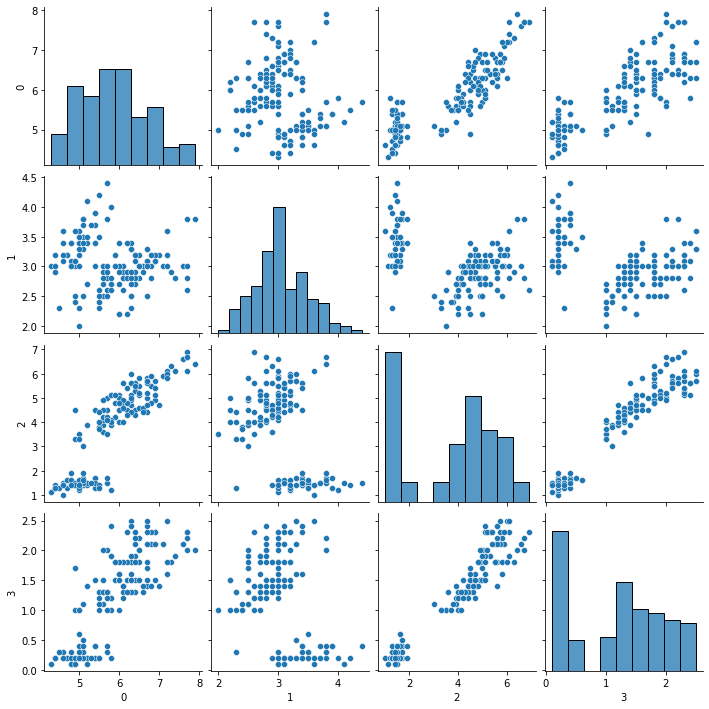

In [ ]:
iris = load_iris()
Data = pd.DataFrame(iris.data)
g = sns.pairplot(Data)
cov_mat = np.cov(Data,rowvar = False)
cov_mat 

In [ ]:
X = iris.data
Y = iris.target

Data = pd.DataFrame(X)
Data["Target"] =  Y
Data

,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

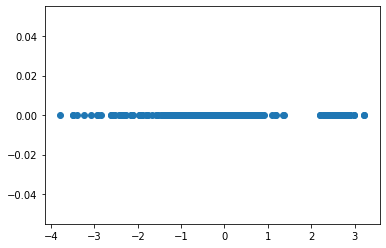

In [ ]:
New_data = PCA(Data,4)

#g_prime = sns.pairplot(pd.DataFrame(New_data))
zeros = np.zeros(np.shape(New_data))
plt.scatter(New_data,zeros)
iris.target_names

This shows us that even one Principal component is enough to find the clusters. But we just need to put labels on the data.